<a href="https://colab.research.google.com/github/Luichoo/Arbol_AVL_con_allegro/blob/main/Cuadernos/Iris_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder


## Base de datos

In [4]:
dataset=np.loadtxt('/content/drive/MyDrive/iris.data',delimiter=',')

In [5]:
dataset.shape

(150, 7)

In [16]:
x = dataset[:,:-3]
y = dataset[:,-3:]



In [9]:
scaler=MinMaxScaler((0,1))
X=scaler.fit_transform(x)


In [19]:
trainx, testx, trainy, testy = train_test_split(X,y, test_size=.5)


## Training

In [20]:
model = Sequential()
model.add(Dense(14, input_dim=4, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(trainx, trainy,validation_data=(testx, testy), epochs=300)

Epoch 1/300
3/3 [==============================] - 2s 220ms/step - loss: 0.8102 - accuracy: 0.6133 - val_loss: 0.7781 - val_accuracy: 0.7200
Epoch 2/300
3/3 [==============================] - 0s 30ms/step - loss: 0.7994 - accuracy: 0.6133 - val_loss: 0.7691 - val_accuracy: 0.7200
Epoch 3/300
3/3 [==============================] - 0s 37ms/step - loss: 0.7888 - accuracy: 0.6133 - val_loss: 0.7607 - val_accuracy: 0.7200
Epoch 4/300
3/3 [==============================] - 0s 37ms/step - loss: 0.7791 - accuracy: 0.6133 - val_loss: 0.7527 - val_accuracy: 0.7200
Epoch 5/300
3/3 [==============================] - 0s 36ms/step - loss: 0.7699 - accuracy: 0.6133 - val_loss: 0.7451 - val_accuracy: 0.7200
Epoch 6/300
3/3 [==============================] - 0s 26ms/step - loss: 0.7612 - accuracy: 0.6133 - val_loss: 0.7380 - val_accuracy: 0.7200
Epoch 7/300
3/3 [==============================] - 0s 25ms/step - loss: 0.7528 - accuracy: 0.6133 - val_loss: 0.7313 - val_accuracy: 0.7200
Epoch 8/300
3/3 [==

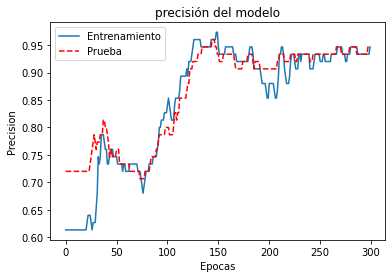

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.savefig('grafica_iris.png', dpi=300)
plt.show()

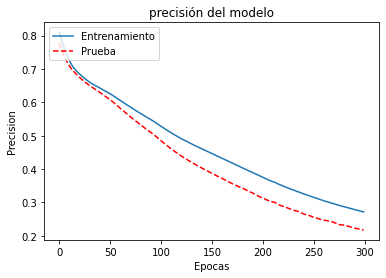

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.savefig('grafica_diabetes_loss.png', dpi=300)
plt.show()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                70        
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [26]:
y_predic = model.predict(testx)
y_predic

3/3 [==============================] - 0s 9ms/step


array([[9.98209536e-01, 1.66276889e-03, 1.14946179e-02],
       [1.61897629e-01, 2.31215194e-01, 8.09021652e-01],
       [9.94699478e-01, 4.52587241e-03, 2.07031630e-02],
       [9.99531269e-01, 4.60687384e-04, 5.56771178e-03],
       [1.59946203e-01, 2.26665556e-01, 8.14205348e-01],
       [3.04109335e-01, 5.63269198e-01, 3.84250641e-01],
       [1.59015507e-01, 2.24502414e-01, 8.16656828e-01],
       [9.97775555e-01, 2.04391009e-03, 1.29243713e-02],
       [9.99798417e-01, 2.08682439e-04, 3.56561970e-03],
       [9.98563170e-01, 1.29279657e-03, 1.00304326e-02],
       [3.10039401e-01, 5.75455189e-01, 3.68902355e-01],
       [1.24017097e-01, 1.47335902e-01, 8.97770107e-01],
       [9.98209536e-01, 1.66276889e-03, 1.14946179e-02],
       [2.65187770e-01, 4.78301525e-01, 4.94353682e-01],
       [9.98996794e-01, 9.42061597e-04, 8.34972784e-03],
       [3.15856695e-01, 5.69353044e-01, 3.65362316e-01],
       [2.92276204e-01, 5.38322449e-01, 4.16081667e-01],
       [3.10039401e-01, 5.75455

In [45]:
y_predictC=np.round(y_predic)
y_predictC

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import pandas as pd

results = confusion_matrix(testy.argmax(1),y_predictC.argmax(1))


# Transform to df for easier plotting
cm_df = pd.DataFrame(results,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

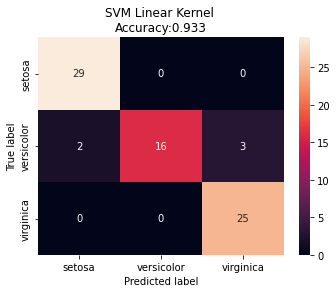

In [63]:


plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(testy, y_predictC)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
exactitud = (results[0,0]+results[1,1]+results[2,2])/np.sum(results)
especificidad = results[0,0]/np.sum(results[0,0:])
error = (results[0,1]+results[1,0])/np.sum(results)
precision_negativa = results[0,0]/np.sum(results[0:,0])
precision = results[1,1]/np.sum(results[0,0:])
sensibilidad = results[1,1]/np.sum(results[1,0:])
print("exactitud =",exactitud)
print("especificidad =",especificidad)
print("error =",error)
print("Precision negativa =",precision_negativa)
print("Precision =",precision)
print("Sensibilidad =",sensibilidad)

75
exactitud = 0.9333333333333333
especificidad = 1.0
error = 0.02666666666666667
Precision negativa = 0.9354838709677419
Precision = 0.5517241379310345
Sensibilidad = 0.7619047619047619
